In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsforecast import StatsForecast
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast.models import ARIMA

# Demand over time - Creating the synthetic data

In [104]:
np.random.seed(42)

# Parameters for initial components
start_date = "2018-01-01"
periods = 365 * 3  # Daily data for three years
trend = 0.01  # Linear trend component
seasonal_amplitude = 5  # Amplitude of the seasonal component
seasonal_period = 30.44 # Monthly
noise_level = 5  # Level of random noise

# Create initial components
time = np.arange(periods)
date_range = pd.date_range(start=start_date, periods=periods)
trend_component = trend * time
seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * time / seasonal_period)
noise_component = noise_level * np.random.randn(periods)
demand = 100 + trend_component + seasonal_component + noise_component

# Initial demand series
df = pd.DataFrame({'ds': date_range, 'y': demand})
df['unique_id'] = 1
df['month_day'] = df['ds'].dt.strftime('%m-%d')

# Parameters for special events
base_drop_amount = -60
base_increase_amount = 30
adjustment_noise_level = 15
drop_dates = df['month_day'] == '12-25'
increase_dates = df['month_day'] == '03-31'

# Apply special events adjustments
drop_noise = np.random.normal(loc=0, scale=adjustment_noise_level, size=len(df))
increase_noise = np.random.normal(loc=0, scale=adjustment_noise_level, size=len(df))
df.loc[drop_dates, 'y'] += base_drop_amount + drop_noise[drop_dates]
df.loc[increase_dates, 'y'] += base_increase_amount + increase_noise[increase_dates]
df.drop(columns=['month_day'], inplace=True)

# Create deamdn forecast
df['demand_forecast'] = df['y'] * np.random.uniform(0.8, 1.2, len(df))


In [105]:
df

,ds,y,unique_id,demand_forecast
0,2018-01-01,102.483571,1,91.837542
1,2018-01-02,100.343426,1,84.086397
2,2018-01-03,105.264432,1,97.471430
3,2018-01-04,110.547217,1,92.711300
4,2018-01-05,102.544172,1,89.291238
...,...,...,...,...
1090,2020-12-26,105.871999,1,87.609245
1091,2020-12-27,106.519144,1,108.637479
1092,2020-12-28,110.997164,1,107.319352
1093,2020-12-29,108.423689,1,124.806482


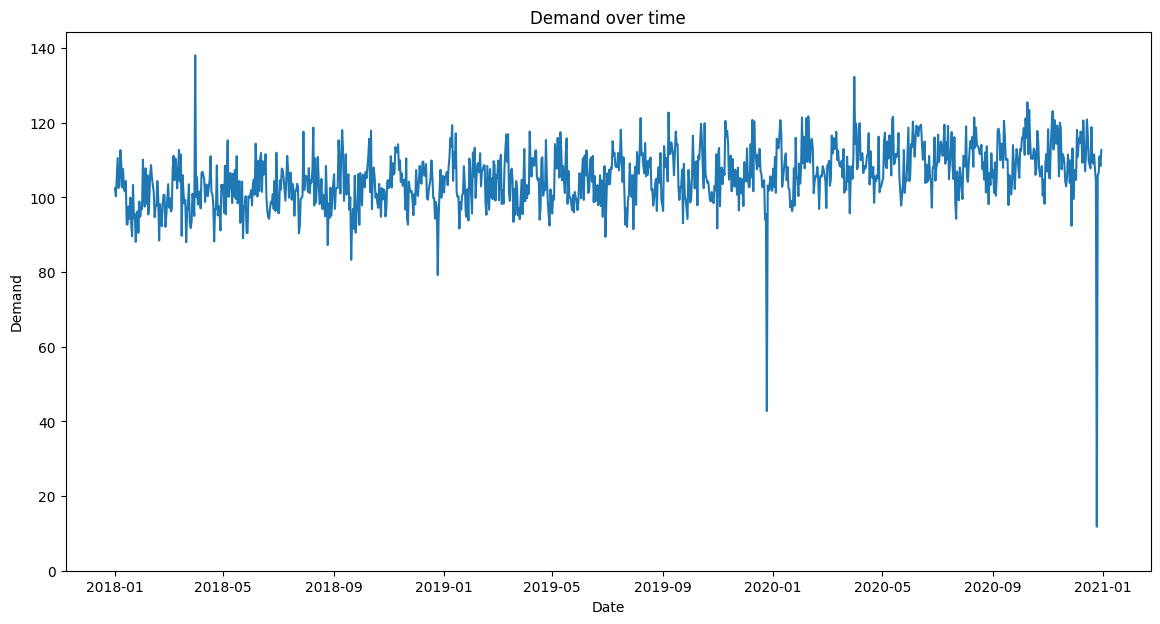

In [106]:
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], label='Demand')
plt.title('Demand over time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.ylim(bottom=0)
plt.show()

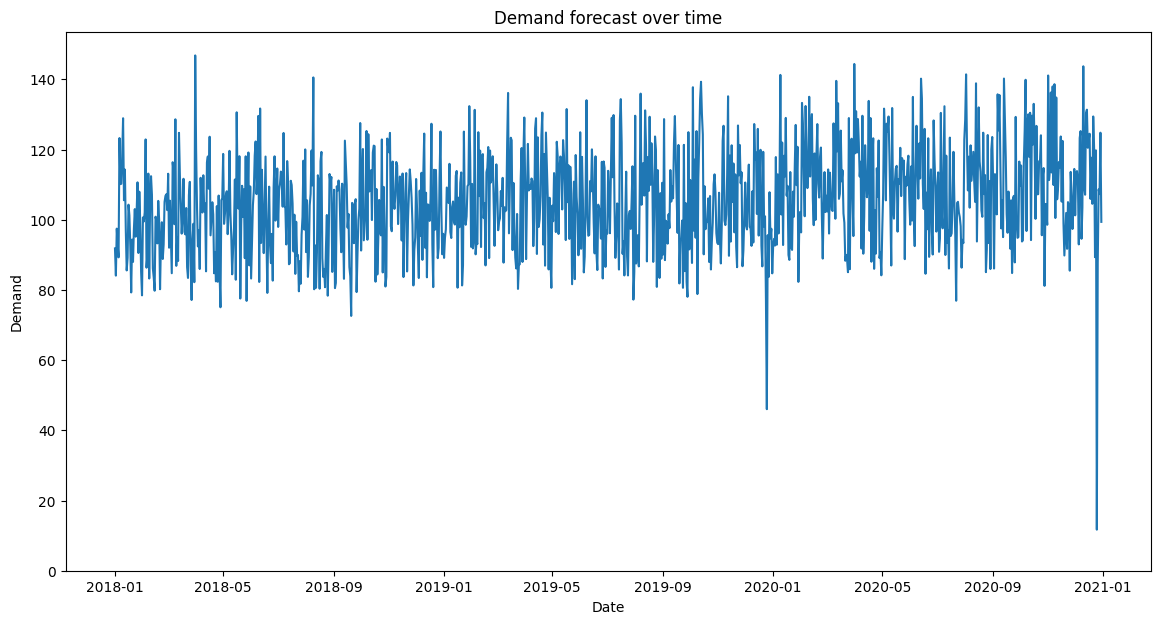

In [107]:
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['demand_forecast'], label='Demand')
plt.title('Demand forecast over time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.ylim(bottom=0)
plt.show()

# Forecasting demand

In [ ]:
df['yhat'] = df['y'] * 

In [ ]:
# ARIMA : Non-seasonal Autoregressive Integrated Moving Averages
# SARIMA : Seasonal ARIMA
# SARIMAX : Seasonal ARIMA with exogenous variables

In [ ]:
# p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.
# q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.
# d is the number of differencing required to make the time series stationary.

In [ ]:
# Level: This is the primary value that averages over time.
# Trend: The trend is the value that causes increasing or decreasing patterns in a time series.
# Seasonality: This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
# Residual/Noise: These are the random variations in the time series.

In [ ]:
# Additive time series: y(t)=level+Trend+seasonality+noise
# Multiplicative time series: y(t)=Level∗Trend∗seasonality∗Noise

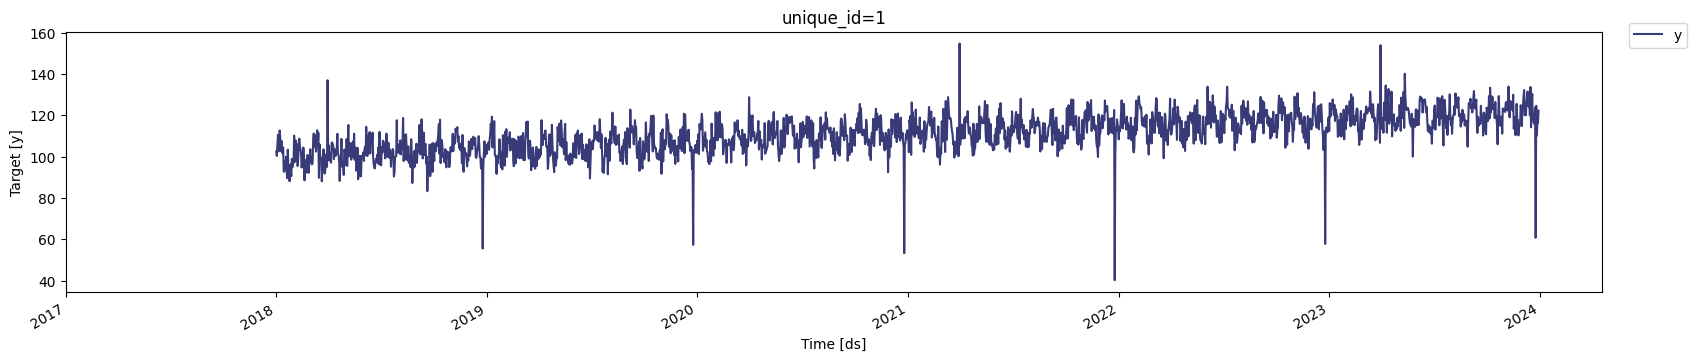

In [49]:
StatsForecast.plot(df)

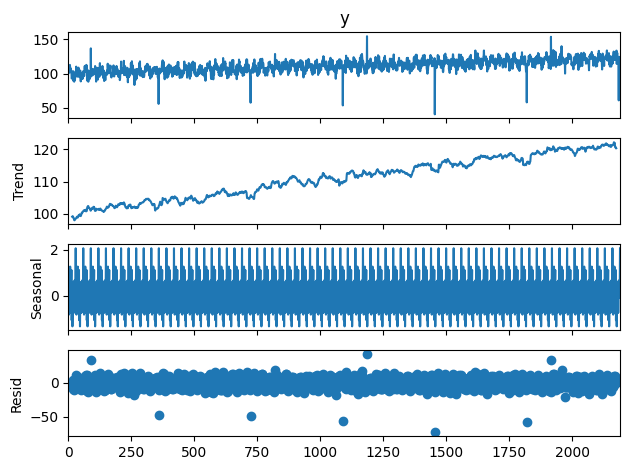

In [56]:
decomposed=seasonal_decompose(df["y"], model = "add", period=30)
decomposed.plot()
plt.show()

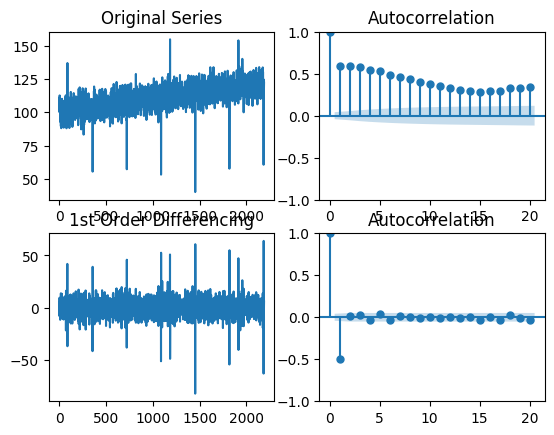

In [61]:
fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df["y"], ax=axes[0, 1], lags=20)

axes[1, 0].plot(df["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["y"].diff().dropna(), ax=axes[1, 1], lags=20)

plt.show()

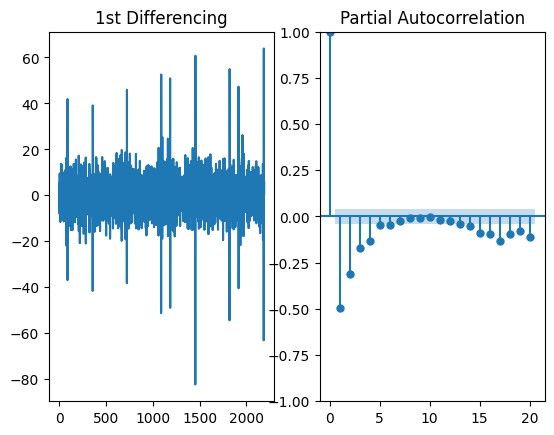

In [62]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()

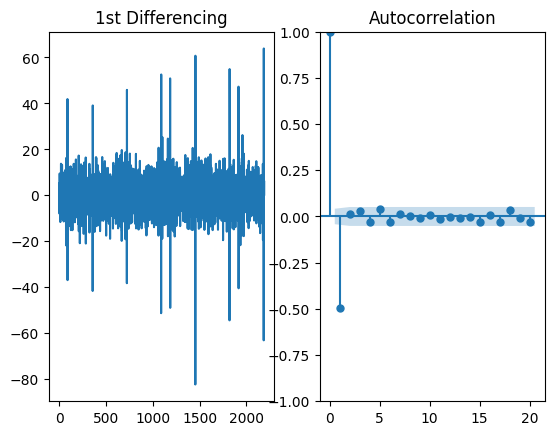

In [63]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()

In [86]:
train_index = round(len(df)/2)
forecast_index = len(df)

arima = ARIMA(order=(1, 1, 1), season_length=30)
arima = arima.fit(y=df.iloc[0:train_index, :]["y"].values)

In [87]:
arima.forecast(y=df.iloc[train_len:forecast_index, :]["y"].values, h=6, fitted=True)

{'mean': array([115.14047464, 115.67966546, 115.6385169 , 115.64165717,
        115.64141752, 115.6414358 ]),
 'fitted': array([109.57413961, 110.06343685, 109.92558564, ..., 109.17755767,
        110.94637915, 112.6152441 ])}